# Fluxonium Design with 6 single qubits NEW-SIMPLE look

### Preparations

In [1]:
# For convenience, let's begin by enabling
# automatic reloading of modules when they change.
%load_ext autoreload
%autoreload 2

import numpy as np
from collections import OrderedDict

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, open_docs
import matplotlib.pyplot as plt

from qiskit_metal.toolbox_metal import math_and_overrides

from qiskit_metal.qlibrary.core import QComponent

from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors

from qiskit_metal.qlibrary.qubits.fluxoniumLOM import FluxoniumPocket
from qiskit_metal.qlibrary.qubits.fluxoniumEPR import FluxoniumPocket

from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
#from qiskit_metal.qlibrary.terminations.launchpad_wb_coupled import LaunchpadWirebondCoupled

from qiskit_metal.qlibrary.terminations.open_to_ground_v2 import OpenToGround
#from qiskit_metal.qlibrary.terminations.short_to_ground import ShortToGround

#from qiskit_metal.renderers.renderer_gds.gds_renderer import QGDSRenderer
from qiskit_metal.renderers.renderer_ansys.ansys_renderer import QAnsysRenderer
from qiskit_metal.analyses.quantization import LOManalysis

from qiskit_metal.analyses.sweep_and_optimize.sweeping import Sweeping


import pyEPR as epr
from qiskit_metal.analyses.quantization import EPRanalysis
#from qiskit_metal.analyses.quantization import EPRanalysis


In [2]:
# Each time you create a new quantum circuit design,
# you start by instantiating a QDesign class.

# The design class `DesignPlanar` is best for 2D circuit designs.
design = designs.DesignPlanar()
design.chips.main.material = 'silicon'
design.variables['cpw_width'] = '15 um'
design.variables['cpw_gap'] = '8.733 um'
design._chips['main']['size']['size_x'] = '9mm'
design._chips['main']['size']['size_y'] = '9mm'

# If you disable the next line with "overwrite_enabled", then you will need to
# delete a component [<component>.delete()] before recreating it.
design.overwrite_enabled = True


eig_qres = EPRanalysis(design, "hfss")
hfss = design.renderers.hfss
hfss = eig_qres.sim.renderer
q3d = design.renderers.q3d


gui = MetalGUI(design)

In [3]:
#Just keep it here, do NOT use
#Setup the launchpad1 location and orientation
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
## Read In launch pad
launch_options = dict(chip='main', pos_x='-4.1mm', pos_y='-3.99mm', orientation='0',
        lead_length='30um', pad_width='150um',
        pad_height='150um', pad_gap='71.4um',
        taper_height='122um',
                    )
lp = LaunchpadWirebond(design, 'LPReadIn', options = launch_options)


# Read Out launch pad
launch_options = dict(chip='main', pos_x='4.1mm', pos_y='-3.99mm', orientation='180',
        lead_length='30um', pad_width='150um',
        pad_height='150um', pad_gap='71.4um',
        taper_height='122um',
                    )
lp = LaunchpadWirebond(design, 'LPReadOut', options = launch_options)


from collections import OrderedDict
jogs_in = OrderedDict()
jogs_in[0] = ["L", '8150um']
jogs_in[1] = ["R", '300um']
jogs_in[2] = ["R", '8150um']



Transmission_Line = {'pin_inputs':
           {'start_pin': {'component': 'LPReadIn', 'pin': 'tie'},
             'end_pin': {'component': 'LPReadOut', 'pin': 'tie'}},
            'lead': {'start_straight': '3919um', 'end_straight': '3915um',
                     'start_jogged_extension': jogs_in,
                    }, 
                    'total_length': '8mm', 'fillet': "110um"
            }

TransLine = RoutePathfinder(design, 'TL', Transmission_Line)


gui.rebuild()

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tab

In [4]:
## Q1 flux-bias and charge line
launch_options = dict(chip='main', pos_x='-4.1mm', pos_y='-2.66mm', orientation='0',
        lead_length='30um', pad_width='150um',
        pad_height='150um', pad_gap='71.4um',
        taper_height='122um',
                    )
lp = LaunchpadWirebond(design, 'LPCL1', options = launch_options)

launch_options = dict(chip='main', pos_x='-4.1mm', pos_y='-1.33mm', orientation='0',
        lead_length='30um', pad_width='150um',
        pad_height='150um', pad_gap='71.4um',
        taper_height='122um',
                    )
lp = LaunchpadWirebond(design, 'LPFB1', options = launch_options)


## Q2 flux-bias and charge line
launch_options = dict(chip='main', pos_x='-4.1mm', pos_y='0.0mm', orientation='0',
        lead_length='30um', pad_width='150um',
        pad_height='150um', pad_gap='71.4um',
        taper_height='122um',
                    )
lp = LaunchpadWirebond(design, 'LPCL2', options = launch_options)

launch_options = dict(chip='main', pos_x='-4.1mm', pos_y='+1.33mm', orientation='0',
        lead_length='30um', pad_width='150um',
        pad_height='150um', pad_gap='71.4um',
        taper_height='122um',
                    )
lp = LaunchpadWirebond(design, 'LPFB2', options = launch_options)


## Q3 flux-bias and charge line
launch_options = dict(chip='main', pos_x='-4.1mm', pos_y='2.66mm', orientation='0',
        lead_length='30um', pad_width='150um',
        pad_height='150um', pad_gap='71.4um',
        taper_height='122um',
                    )
lp = LaunchpadWirebond(design, 'LPCL3', options = launch_options)

launch_options = dict(chip='main', pos_x='-4.1mm', pos_y='3.99mm', orientation='0',
        lead_length='30um', pad_width='150um',
        pad_height='150um', pad_gap='71.4um',
        taper_height='122um',
                    )
lp = LaunchpadWirebond(design, 'LPFB3', options = launch_options)


## Q4 flux-bias and charge line
launch_options = dict(chip='main', pos_x='4.1mm', pos_y='3.99mm', orientation='180',
        lead_length='30um', pad_width='150um',
        pad_height='150um', pad_gap='71.4um',
        taper_height='122um',
                    )
lp = LaunchpadWirebond(design, 'LPFB4', options = launch_options)

launch_options = dict(chip='main', pos_x='4.1mm', pos_y='2.66mm', orientation='180',
        lead_length='30um', pad_width='150um',
        pad_height='150um', pad_gap='71.4um',
        taper_height='122um',
                    )
lp = LaunchpadWirebond(design, 'LPCL4', options = launch_options)


## Q5 flux-bias and charge line
launch_options = dict(chip='main', pos_x='4.1mm', pos_y='1.33mm', orientation='180',
        lead_length='30um', pad_width='150um',
        pad_height='150um', pad_gap='71.4um',
        taper_height='122um',
                    )
lp = LaunchpadWirebond(design, 'LPFB5', options = launch_options)

launch_options = dict(chip='main', pos_x='4.1mm', pos_y='-0.00mm', orientation='180',
                      lead_length='30um', pad_width='150um',
        pad_height='150um',
                    )
lp = LaunchpadWirebond(design, 'LPCL5', options = launch_options)


## Q6 flux-bias and charge line
launch_options = dict(chip='main', pos_x='4.1mm', pos_y='-1.33mm', orientation='180',
        lead_length='30um', pad_width='150um',
        pad_height='150um', pad_gap='71.4um',
        taper_height='122um',
                    )
lp = LaunchpadWirebond(design, 'LPFB6', options = launch_options)

launch_options = dict(chip='main', pos_x='4.1mm', pos_y='-2.66mm', orientation='180',
        lead_length='30um', pad_width='150um',
        pad_height='150um', pad_gap='71.4um',
        taper_height='122um',
                    )
lp = LaunchpadWirebond(design, 'LPCL6', options = launch_options)


gui.rebuild()

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.t

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)



In [5]:
from qiskit_metal.qlibrary.qubits.fluxoniumEPR import FluxoniumPocket

# Q1 details
options = dict(chip='main',
    orientation =90, pos_x = '-1.8mm', pos_y = '-1.8mm',
        pocket_height = '700um', pocket_width = '800um',
        pad_width='15um',  pad_height='250um',
        pad_radius='70um',
               
    flux_bias_line_options=Dict(make_fbl = True,
            fbl_sep='150um',
                               ),        
    charge_line_options=Dict(loc_H = +1, make_cl = True,
            cl_sep ='-10um',
                            ), 
    readout_line_options=Dict(loc_H = -1, make_rol = True, 
            pad_width = '300um', pad_height = '80um',
            pad_sep='60um',  
              ) )
               
q1 = FluxoniumPocket(design,'Q1', options = dict(
        gds_cell_name ='FakeJunction_01',
      #  hfss_inductance = '10nH',
      #  q3d_inductance = '10nH',
        **options))

# Q6 details
options = dict(chip='main',
    orientation =90, pos_x = '2.0mm', pos_y = '-2.0mm',
        pocket_height = '700um', pocket_width = '800um',
        pad_width='15um',  pad_height='250um',
        pad_radius='70um',
               
    flux_bias_line_options=Dict(make_fbl = True,
            fbl_sep='150um',
                               ), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = True,                    
            cl_sep ='-10um',                ), 
    readout_line_options=Dict(loc_H = +1, make_rol = True, 
          pad_width = '300um', pad_height = '80um',
            pad_sep='60um',     ) )
               
q6 = FluxoniumPocket(design,'Q6', options = dict(
        gds_cell_name ='FakeJunction_06',
      #  hfss_inductance = '10nH',
      #  q3d_inductance = '10nH',
        **options))


# Q2 details
options = dict(chip='main',
    orientation =90, pos_x = '-2.0mm', pos_y = '0.7mm',
        pocket_height = '700um', pocket_width = '800um',
        pad_width='15um',  pad_height='250um',
        pad_radius='70um',
               
    flux_bias_line_options=Dict(make_fbl = True,
             fbl_sep='150um',
                               ), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,                    
           cl_sep ='-10um',                 ), 
    readout_line_options=Dict(loc_H = -1, make_rol = True, 
         pad_width = '300um', pad_height = '80um',
            pad_sep='60um',     ) )
               
q2 = FluxoniumPocket(design,'Q2', options = dict(
        gds_cell_name ='FakeJunction_02',
      #  hfss_inductance = '10nH',
      #  q3d_inductance = '10nH',
        **options))

# Q5 details
options = dict(chip='main',
    orientation =90, pos_x = '2.0mm', pos_y = '0.8mm',
        pocket_height = '700um', pocket_width = '800um',
        pad_width='15um',  pad_height='250um',
        pad_radius='70um',
               
    flux_bias_line_options=Dict(make_fbl = True,
             fbl_sep='150um',                  ), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = True,                    
            cl_sep ='-10um',                ), 
    readout_line_options=Dict(loc_H = +1, make_rol = True, 
         pad_width = '300um', pad_height = '80um',
            pad_sep='60um',    ) )
               
q5 = FluxoniumPocket(design,'Q5', options = dict(
        gds_cell_name ='FakeJunction_05',
      #  hfss_inductance = '10nH',
      #  q3d_inductance = '10nH',
        **options))


# Q3 details
options = dict(chip='main',
    orientation =90, pos_x = '-2.3mm', pos_y = '3.2mm',
        pocket_height = '700um', pocket_width = '800um',
        pad_width='15um',  pad_height='250um',
        pad_radius='70um',
               
    flux_bias_line_options=Dict(make_fbl = True,
           fbl_sep='150um',                    ), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,                    
            cl_sep ='-10um',                ), 
    readout_line_options=Dict(loc_H = -1, make_rol = True, 
     pad_width = '300um', pad_height = '80um',
            pad_sep='60um',        ) )
               
q3 = FluxoniumPocket(design,'Q3', options = dict(
        gds_cell_name ='FakeJunction_03',
      #  hfss_inductance = '10nH',
      #  q3d_inductance = '10nH',
        **options))

# Q4 details
options = dict(chip='main',
    orientation =90, pos_x = '2.4mm', pos_y = '3.2mm',
        pocket_height = '700um', pocket_width = '800um',
        pad_width='15um',  pad_height='250um',
        pad_radius='70um',
               
    flux_bias_line_options=Dict(make_fbl = True,
           fbl_sep='150um',                    ), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = True,                    
           cl_sep ='-10um',                 ), 
    readout_line_options=Dict(loc_H = 1, make_rol = True, 
        pad_width = '300um', pad_height = '80um',
            pad_sep='60um',     ) )
               
q4 = FluxoniumPocket(design,'Q4', options = dict(
        gds_cell_name ='FakeJunction_04',
      #  hfss_inductance = '10nH',
      #  q3d_inductance = '10nH',
        **options))

gui.rebuild()

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)



In [6]:
from qiskit_metal.qlibrary.terminations.open_to_ground_v2 import OpenToGround
otg1 = OpenToGround(design, 'otg1s', 
                    options=dict(chip='main',
                 pos_x='-0.196466mm', pos_y='-2.1mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity1',  Dict(meander=Dict(spacing='200um'),
        total_length='8.3mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg1s', pin='open'),
            end_pin=Dict(component='Q1', pin='readout_line')), ))

gui.rebuild()

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

In [7]:
otg6 = OpenToGround(design, 'otg6s', options=dict(chip='main', pos_x='0.196466mm',  pos_y='-1.7mm', orientation='90'))
rt_meander = RouteMeander(design, 'cavity6',  Dict(meander=Dict(spacing='200um'),
        total_length='9.0mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg6s', pin='open'),
            end_pin=Dict(component='Q6', pin='readout_line')), ))

gui.rebuild()

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)



In [8]:
otg2 = OpenToGround(design, 'otg2s', options=dict(chip='main', pos_x='-0.196466mm',  pos_y='0.6mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity2',  Dict(meander=Dict(spacing='200um'),
        total_length='9.6mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg2s', pin='open'),
            end_pin=Dict(component='Q2', pin='readout_line')), ))

gui.rebuild()

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)



In [9]:
otg5 = OpenToGround(design, 'otg5s', options=dict(chip='main', pos_x='0.196466mm',  pos_y='1.1mm', orientation='90'))
rt_meander = RouteMeander(design, 'cavity5',  Dict(meander=Dict(spacing='200um'),
        total_length='10.4mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg5s', pin='open'),
            end_pin=Dict(component='Q5', pin='readout_line')), ))

gui.rebuild()

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.table

In [10]:
otg3 = OpenToGround(design, 'otg3s', options=dict(chip='main', pos_x='-0.196466mm',  pos_y='3.0mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity3',  Dict(meander=Dict(spacing='200um'),
        total_length='11.2mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg3s', pin='open'),
            end_pin=Dict(component='Q3', pin='readout_line')), ))

gui.rebuild()

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.table

In [11]:
otg4 = OpenToGround(design, 'otg4s', options=dict(chip='main', pos_x='0.196466mm',  pos_y='3.44mm', orientation='90'))
rt_meander = RouteMeander(design, 'cavity4',  Dict(meander=Dict(spacing='200um'),
        total_length='11.6mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg4s', pin='open'),
            end_pin=Dict(component='Q4', pin='readout_line')), ))


gui.rebuild()
gui.autoscale()

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.table

In [12]:
# Charge Line and Flux Bias Line for Q1
from collections import OrderedDict
jogs = OrderedDict()
#jogs[0] = ["R", '400um']
#jogs[1] = ["L", '200um']

XYCharge_LineQ1 = RoutePathfinder(design, 'XY_Gate1', 
        options = dict(chip='main', fillet='99um',
            lead=dict(start_straight='250um', end_straight='1200um', 
                      start_jogged_extension=jogs,),
                         pin_inputs=Dict( start_pin=Dict(
                    component='Q1', pin='charge_line'),
                    end_pin=Dict(component='LPCL1',
                                 pin='tie')
                                            )))

gui.rebuild()

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.table

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)



In [13]:
# Charge Line and Flux Bias Line for Q1
from collections import OrderedDict
jogs = OrderedDict()
jogs[0] = ["L", '600um']
#jogs[1] = ["R", '50um']

ZFluxBias_LineQ1 = RoutePathfinder(design, 'Z_Gate1', 
        options = dict(chip='main', fillet='99um',
            lead=dict(start_straight='400um', 
        end_straight='600um', start_jogged_extension=jogs,),
        pin_inputs=Dict(start_pin=Dict(component='Q1', 
              pin='flux_bias_line'),
          end_pin=Dict(component='LPFB1', pin='tie')
                                   )))

gui.rebuild()

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.table

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)



In [14]:
# Charge Lıne and Flux Bias Line for Q2
from collections import OrderedDict
jogs = OrderedDict()
#jogs[0] = ["R", '2100um']
#jogs[1] = ["L", '500um']

XYCharge_LineQ2 = RoutePathfinder(design, 'XY_Gate2', options = dict(chip='main',
                        fillet='80um',
                lead=dict(start_straight='250um', end_straight='850um', 
                    start_jogged_extension=jogs,),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q2',
                                                    pin='charge_line'),
                                                end_pin=Dict(
                                                    component='LPCL2',
                                                    pin='tie')
                                            )))

gui.rebuild()

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.table

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)



In [15]:
# Charge Lıne and Flux Bias Line for Q2
from collections import OrderedDict
jogs = OrderedDict()
jogs[0] = ["L", '600um']
#jogs[1] = ["L", '100um']

ZFluxBias_LineQ2 = RoutePathfinder(design, 'Z_Gate2', options = dict(chip='main',
             fillet='99um',
          lead=dict(start_straight='400um', end_straight='450um', 
                    start_jogged_extension=jogs,),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q2',
                                                    pin='flux_bias_line'),
                                                end_pin=Dict(
                                                    component='LPFB2',
                                                    pin='tie')
                                            )))

gui.rebuild()

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.table

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)



In [16]:
# Charge Lıne and Flux Bias Line for Q3
from collections import OrderedDict
jogs = OrderedDict()
#jogs[0] = ["L", '150um']

XYCharge_LineQ3 = RoutePathfinder(design, 'XY_Gate3', options = dict(chip='main',
                         fillet='99um',
       lead=dict(start_straight='250um', end_straight='600um',
                start_jogged_extension=jogs),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q3',
                                                    pin='charge_line'),
                                                end_pin=Dict(
                                                    component='LPCL3',
                                                    pin='tie')
                                            )))
gui.rebuild()

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.table

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_

In [17]:
# Charge Lıne and Flux Bias Line for Q3
from collections import OrderedDict
jogs = OrderedDict()


ZFluxBias_LineQ3 = RoutePathfinder(design, 'Z_Gate3', options = dict(chip='main',
                                   fillet='99um',
           lead=dict(start_straight='100um', end_straight='200um', 
                    start_jogged_extension=jogs,),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q3',
                                                    pin='flux_bias_line'),
                                                end_pin=Dict(
                                                    component='LPFB3',
                                                    pin='tie')
                                            )))

gui.rebuild()

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.table

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_

In [18]:
# Charge Line and Flux Bias Line for Q6
from collections import OrderedDict
jogs = OrderedDict()

XYCharge_LineQ6 = RoutePathfinder(design, 'XY_Gate6', 
        options = dict(chip='main', fillet='99um',
        lead=dict(start_straight='200um', end_straight='1000um', 
                  start_jogged_extension=jogs),
    pin_inputs=Dict(start_pin=Dict(component='Q6', pin='charge_line'),
    end_pin=Dict(component='LPCL6', pin='tie')
                                            )))

gui.rebuild()

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.table

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_

In [19]:
# Charge Line and Flux Bias Line for Q6
from collections import OrderedDict
jogs = OrderedDict()
#jogs[0] = ["R", '600um']

ZFluxBias_LineQ6 = RoutePathfinder(design, 'Z_Gate6', 
        options = dict(chip='main', fillet='99um',
            lead=dict(start_straight='400um', end_straight='600um'),
        pin_inputs=Dict(start_pin=Dict(component='Q6', 
              pin='flux_bias_line'),
          end_pin=Dict(component='LPFB6', pin='tie')
                                   )))

gui.rebuild()

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.table

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)



In [20]:
# Charge Line and Flux Bias Line for Q5
from collections import OrderedDict
jogs = OrderedDict()
#jogs[0] = ["R", '2800um']
#jogs[1] = ["L", '300um']

XYCharge_LineQ5 = RoutePathfinder(design, 'XY_Gate5', options = dict(chip='main',
                          fillet='99um',
            lead=dict(start_straight='150um', end_straight='850um', 
                  start_jogged_extension=jogs),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q5',
                                                    pin='charge_line'),
                                                end_pin=Dict(
                                                    component='LPCL5',
                                                    pin='tie')
                                            )))

gui.rebuild()

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.table

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)



In [21]:
# Charge Lıne and Flux Bias Line for Q5
from collections import OrderedDict
jogs = OrderedDict()
jogs[0] = ["R", '800um']
#jogs[1] = ["R", '200um']

ZFluxBias_LineQ5 = RoutePathfinder(design, 'Z_Gate5', options = dict(chip='main',
                    fillet='99um',
            lead=dict(start_straight='300um', end_straight='450um', 
                  start_jogged_extension=jogs),
                            pin_inputs=Dict(
                                start_pin=Dict(
                                    component='Q5',
                                        pin='flux_bias_line'),
                                        end_pin=Dict(
                                        component='LPFB5',
                                            pin='tie')
                                            )))
gui.rebuild()

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.table

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)



In [22]:
# Charge Lıne and Flux Bias Line for Q4
from collections import OrderedDict
jogs = OrderedDict()


XYCharge_LineQ4 = RoutePathfinder(design, 'XY_Gate4', options = dict(chip='main',
                                 fillet='99um',
                    lead=dict(start_straight='200um', end_straight='550um', 
                  start_jogged_extension=jogs),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q4',
                                                    pin='charge_line'),
                                                end_pin=Dict(
                                                    component='LPCL4',
                                                    pin='tie')
                                            )))
gui.rebuild()

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.table

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[

In [23]:
# Charge Lıne and Flux Bias Line for Q4
from collections import OrderedDict
jogs = OrderedDict()


ZFluxBias_LineQ4 = RoutePathfinder(design, 'Z_Gate4', options = dict(chip='main',
                                            fillet='99um',
                    lead=dict(start_straight='150um', end_straight='200um', 
                  start_jogged_extension=jogs),
                                            pin_inputs=Dict(
                                                start_pin=Dict(
                                                    component='Q4',
                                                    pin='flux_bias_line'),
                                                end_pin=Dict(
                                                    component='LPFB4',
                                                    pin='tie')
                                            )))
gui.rebuild()

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tab

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.table

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self.tables[kind] = table.append(df, sort=False, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self._net_info = self._net_info.append(temp_df, ignore_index=True)

  self.tables[

In [32]:
q1 #print Q1 information


name:    Q1
class:   FluxoniumPocket       
options: 
  'pos_x'             : '-1.8mm',                     
  'pos_y'             : '-1.8mm',                     
  'orientation'       : 90,                           
  'chip'              : 'main',                       
  'layer'             : '1',                          
  'connection_pads'   : {
                        },
  'pad_gap'           : '30um',                       
  'inductor_width'    : '10um',                       
  'pad_width'         : '15um',                       
  'pad_height'        : '250um',                      
  'pad_radius'        : '70um',                       
  'l_length'          : '1um',                        
  'l_arm_length'      : '50um',                       
  'l_inductance'      : '200nH',                      
  'l_ind_per_square'  : '2nH',                        
  'L_j'               : '16.35nH',                    
  'l_fillet'          : '5um',                        
  'pocket_wid

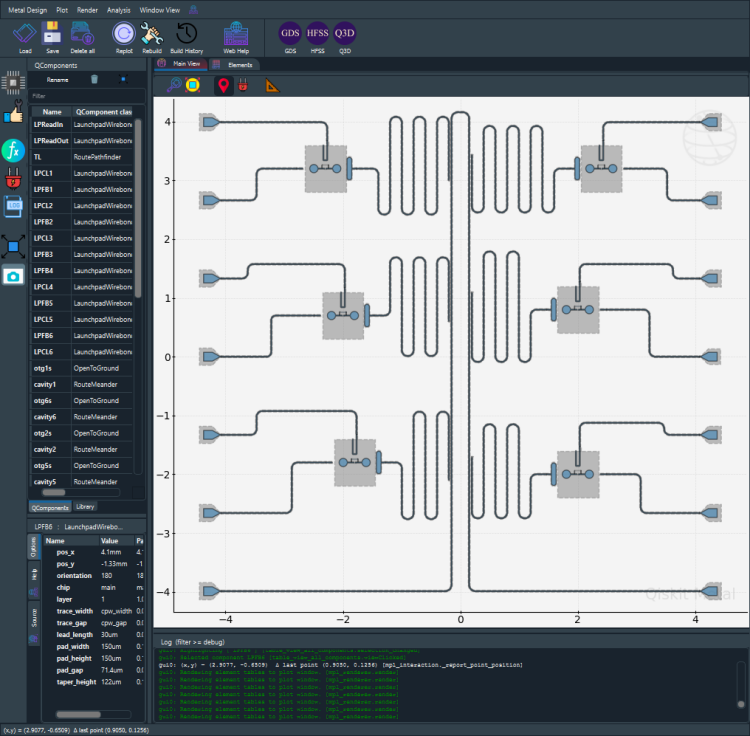

In [33]:
#Save screenshot as a .png formatted file.
gui.screenshot()

In [76]:
gui.main_window.close()

True